#  Lab 4 - Cleaning and EDA of IMDB

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Loading and Cleaning with Pandas</li>
<li> Asking Questions?  </li>
<li> Parsing and Completing the Dataframe  </li>
<li> EDA  </li>
<li> Determining the Best Movies </li>
<li>Trends in Popularity of Genres </li>
</ol>

## Learning Objectives

About 10000 "best movies" were fetched and parsed from IMDB. 

`imdb_top_10000.txt` contain data tabular format as a CSV file. In this lab we'll clean and further parse the data. We'll then do some exploratory data analysis to answer questions about these best books and popular genres.

By the end of this lab, you should be able to:

1. Load and systematically address missing values, ancoded as NaN values in our data set, for example, by removing observations associated with these values.

2. Parse columns in the dataframe to create new dataframe columns.
3. Create and interpret visualizations to explore the data set


### Basic EDA workflow


The basic workflow is as follows:

1. **Scrape**  data using beautiful soup and python request.
2. **Build** a DataFrame from the data (ideally, put all data in this object)
3. **Clean** the DataFrame. It should have the following properties:
    - Each row describes a single object
    - Each column describes a property of that object
    - Columns are numeric whenever appropriate
    - Columns contain atomic properties that cannot be further decomposed
4. Explore **global properties**. Use histograms, scatter plots, and aggregation functions to summarize the data.
5. Explore **group properties**. Use groupby and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of the data's properties, and likely generates several questions for you to followup in subsequent analysis.

## 1. Loading and Cleaning with Pandas
Read in the `imdb_top_10000.txt` file, examine the data, and do any necessary data cleaning.
The textfile is tab-separated, and doesn't have any column headers. We set the appropriate keywords in `pd.read_csv` to handle this

Here is a description of the columns (in order) present in this csv file:

```
imdbID: identifier for the IMDB
title: title of the movie
year: the year the movie was released.
score: Rating of the movie in the scale of 1 - 10
votes: Number of votes received for the movie
runtime: Duration of the movie in min
genres: Genre of the movie seperated by '|'
```

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('imdb_top_10000.txt',delimiter = '\t', names = ['imdbID', 'title', 'year', 'score', 'votes', 'runtime', 'genres'])
df

imdbID                            title  year  score   votes  \
0     tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479   
1     tt0110912              Pulp Fiction (1994)  1994    9.0  490065   
2     tt0137523                Fight Club (1999)  1999    8.8  458173   
3     tt0133093                The Matrix (1999)  1999    8.7  448114   
4     tt1375666                 Inception (2010)  2010    8.9  385149   
...         ...                              ...   ...    ...     ...   
9995  tt0807721                   Meduzot (2007)  2007    7.0    1357   
9996  tt0339642            Daltry Calhoun (2005)  2005    5.2    1357   
9997  tt0060880    The Quiller Memorandum (1966)  1966    6.5    1356   
9998  tt0152836                      Taal (1999)  1999    6.5    1356   
9999  tt0279977            The Navigators (2001)  2001    6.9    1356   

        runtime                            genres  
0     142 mins.                       Crime|Drama  
1     154 mins.                    Crime|Thriller  
2     139 mins.            Drama|Mystery|Thriller  
3     136 mins.           Action|Adventure|Sci-Fi  
4     148 mins.  Action|Adventure|Sci-Fi|Thriller  
...         ...                               ...  
9995   78 mins.                             Drama  
9996  100 mins.        Comedy|Drama|Music|Romance  
9997  104 mins.            Drama|Mystery|Thriller  
9998  179 mins.                   Musical|Romance  
9999   96 mins.                      Comedy|Drama  

[10000 rows x 7 columns]

In [64]:
df.dtypes

imdbID      object
title       object
year         int64
score      float64
votes        int64
runtime     object
genres      object
dtype: object

In [65]:
df.isnull().sum()

imdbID     0
title      0
year       0
score      0
votes      0
runtime    0
genres     1
dtype: int64

In [66]:
df.shape

(10000, 7)

In [67]:
df.dropna(inplace = True)

In [68]:
df.isnull().sum()

imdbID     0
title      0
year       0
score      0
votes      0
runtime    0
genres     0
dtype: int64

In [69]:
df.shape

(9999, 7)

## 2. Asking Questions

In [70]:
# Determine which movie is best 

## 3. Parsing and Completing the DataFrame

There are several problems with the DataFrame at this point:

- The runtime column describes a number, but is stored as a string
- The genres column is not atomic -- it aggregates several genres together. This makes it hard, for example, to extract which movies are Comedies.
- The movie year is repeated in the title and year column

In [71]:
# Fetching first value from runtime row
run_time = df.runtime[0]
run_time

'142 mins.'

In [72]:
# Spliting runtime
newRunTime = run_time.split(" ")[0]
newRunTime

'142'

In [73]:
runtime = [int(runtime.split(" ")[0]) for runtime in df.runtime]
df['runtime'] = runtime
df.head()

imdbID                            title  year  score   votes  runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479      142   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065      154   
2  tt0137523                Fight Club (1999)  1999    8.8  458173      139   
3  tt0133093                The Matrix (1999)  1999    8.7  448114      136   
4  tt1375666                 Inception (2010)  2010    8.9  385149      148   

                             genres  
0                       Crime|Drama  
1                    Crime|Thriller  
2            Drama|Mystery|Thriller  
3           Action|Adventure|Sci-Fi  
4  Action|Adventure|Sci-Fi|Thriller

In [74]:
# it checks how many types of genre are there in genres
genre_set = set()
for genre in df.genres:
  genre_set.update(genre.split("|"))
# df.dtypes

In [75]:
# Total genre avaiable in genres
len(genre_set)

24

In [76]:
# This splits the genre_set as a subset of genres columns
for genre in genre_set:
  df[genre] = [genre in row.split('|') for row in df.genres]

In [77]:
df.head()

imdbID                            title  year  score   votes  runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479      142   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065      154   
2  tt0137523                Fight Club (1999)  1999    8.8  458173      139   
3  tt0133093                The Matrix (1999)  1999    8.7  448114      136   
4  tt1375666                 Inception (2010)  2010    8.9  385149      148   

                             genres    War  Horror  Family  ...  Action  \
0                       Crime|Drama  False   False   False  ...   False   
1                    Crime|Thriller  False   False   False  ...   False   
2            Drama|Mystery|Thriller  False   False   False  ...   False   
3           Action|Adventure|Sci-Fi  False   False   False  ...    True   
4  Action|Adventure|Sci-Fi|Thriller  False   False   False  ...    True   

   History  Sci-Fi   News  Musical  Animation  Biography  Film-Noir  Adult  \
0    False   False  False    False      False      False      False  False   
1    False   False  False    False      False      False      False  False   
2    False   False  False    False      False      False      False  False   
3    False    True  False    False      False      False      False  False   
4    False    True  False    False      False      False      False  False   

   Drama  
0   True  
1  False  
2   True  
3  False  
4  False  

[5 rows x 31 columns]

In [78]:
title = df.title[0]
title

'The Shawshank Redemption (1994)'

In [79]:
titles = [title[:-7] for title in df.title]
df['title'] = titles
df.head()

imdbID                     title  year  score   votes  runtime  \
0  tt0111161  The Shawshank Redemption  1994    9.2  619479      142   
1  tt0110912              Pulp Fiction  1994    9.0  490065      154   
2  tt0137523                Fight Club  1999    8.8  458173      139   
3  tt0133093                The Matrix  1999    8.7  448114      136   
4  tt1375666                 Inception  2010    8.9  385149      148   

                             genres    War  Horror  Family  ...  Action  \
0                       Crime|Drama  False   False   False  ...   False   
1                    Crime|Thriller  False   False   False  ...   False   
2            Drama|Mystery|Thriller  False   False   False  ...   False   
3           Action|Adventure|Sci-Fi  False   False   False  ...    True   
4  Action|Adventure|Sci-Fi|Thriller  False   False   False  ...    True   

   History  Sci-Fi   News  Musical  Animation  Biography  Film-Noir  Adult  \
0    False   False  False    False      False      False      False  False   
1    False   False  False    False      False      False      False  False   
2    False   False  False    False      False      False      False  False   
3    False    True  False    False      False      False      False  False   
4    False    True  False    False      False      False      False  False   

   Drama  
0   True  
1  False  
2   True  
3  False  
4  False  

[5 rows x 31 columns]

In [80]:
df.isnull().sum()

imdbID        0
title         0
year          0
score         0
votes         0
runtime       0
genres        0
War           0
Horror        0
Family        0
Music         0
Romance       0
Fantasy       0
Reality-TV    0
Crime         0
Adventure     0
Mystery       0
Sport         0
Western       0
Thriller      0
Comedy        0
Action        0
History       0
Sci-Fi        0
News          0
Musical       0
Animation     0
Biography     0
Film-Noir     0
Adult         0
Drama         0
dtype: int64

## 4. EDA

In [81]:
#Checking max and min in runtime
small_df = df[['runtime', 'title']]
run_time = small_df['runtime']
print("Maximum runtime")
print(run_time.max())
print("Minimum runtime")
print(run_time.min())

Maximum runtime
450
Minimum runtime
0


In [82]:
small_df = df[['title', 'runtime']]
result = small_df[(small_df['runtime'] >= 100)]
result.head()

title  runtime
0  The Shawshank Redemption      142
1              Pulp Fiction      154
2                Fight Club      139
3                The Matrix      136
4                 Inception      148

## 5. Determining Best Movies

In [95]:
#Answer
title = df.groupby('title')
title.head(5)
title['score'].max()

title
'Crocodile' Dundee            6.5
'Round Midnight               7.2
'Tamara Drewe'                6.3
'Til There Was You            4.4
(500) Days of Summer          8.0
                             ... 
\xc7a commence aujourd'hui    7.4
eXistenZ                      6.8
w Delta z                     5.8
xXx                           5.6
xXx: State of the Union       4.1
Name: score, Length: 9738, dtype: float64

In [97]:
df[df.score == df.score.max()][['title', 'year', 'score', 'votes', 'genres', 'runtime']]

title  year  score   votes       genres  runtime
0   The Shawshank Redemption  1994    9.2  619479  Crime|Drama      142
26             The Godfather  1972    9.2  474189  Crime|Drama      175

## 6. Trends in Popularity of Genres

In [84]:
genredf = df[list(genre_set)]
genredf.head()

War  Horror  Family  Music  Romance  Fantasy  Reality-TV  Crime  \
0  False   False   False  False    False    False       False   True   
1  False   False   False  False    False    False       False   True   
2  False   False   False  False    False    False       False  False   
3  False   False   False  False    False    False       False  False   
4  False   False   False  False    False    False       False  False   

   Adventure  Mystery  ...  Action  History  Sci-Fi   News  Musical  \
0      False    False  ...   False    False   False  False    False   
1      False    False  ...   False    False   False  False    False   
2      False     True  ...   False    False   False  False    False   
3       True    False  ...    True    False    True  False    False   
4       True    False  ...    True    False    True  False    False   

   Animation  Biography  Film-Noir  Adult  Drama  
0      False      False      False  False   True  
1      False      False      False  False  False  
2      False      False      False  False   True  
3      False      False      False  False  False  
4      False      False      False  False  False  

[5 rows x 24 columns]

In [85]:
genre_result = genredf.sum()
y = genre_result.sort_values(ascending=False)[:10]
x = y.index

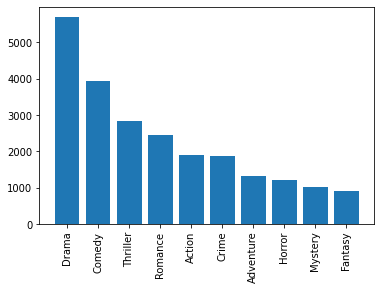

In [86]:
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()